In [1]:
from codes.python import load_database,ECG_denoising
from codes.python import QRS_detector
import numpy as np
from scipy.signal import resample
from scipy.signal import savgol_filter
import operator
from numpy import array
import sys
import csv
import os
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing, plot
from codes.python import heartbeat_segmentation as shs
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from codes.python import curve_smoothing 

In [ ]:
mitdb = load_database.load_mitdb()
mitdb.segment_beats()


C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/100
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/101
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/101.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/101.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/101pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/102
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/102.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/102.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/102pt

C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/201.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/201pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/202
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/202.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/202.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/202pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/203
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/203.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/203.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/203pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/205
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/205

Filtered MLII records from : 102
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 102 completes.
Start segmenting records: 103
Filtered MLII records from : 103
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 103 completes.
Start segmenting records: 104
Filtered MLII records from : 104
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 104 completes.
Start segmenting records: 105
Filtered MLII records from : 105
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 105 completes.
Start segmenting records: 106
Filtered MLII records from : 106
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 106 completes.
Start segmenting records: 107
Filtered MLII records from : 107
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 107 completes.
Start segmenting records: 108
Filtered MLII records from : 108
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 108 completes.
Start segmentin

In [11]:
def find_S_point(signal, R_peaks):
        num_peak = len(R_peaks)
        S_points = []   
        for i in range(num_peak):
                #print(i)
                point = R_peaks[i]
                if point+1 > len(signal):
                        #print("here")
                        break
                
                while signal[point] >= signal[point + 1]:
                        
                        point += 1
                        if point >= len(signal):
                                #print("here")
                                break
                S_points.append(point)
                #print(point)
                        
        return np.asarray(S_points)






C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/123
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/123.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/123.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/123pt.csv
Start segmenting records: 123
Filtered MLII records from : 123
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 123 completes.


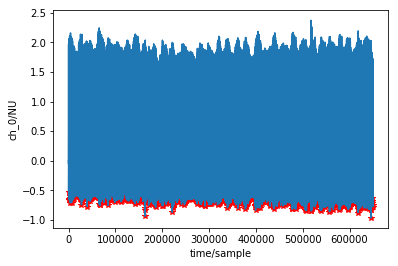

In [12]:
mit123 = load_database.load_patient_record("mitdb","123")
mit123.set_segmented_beats_r_pos(winL=100,winR=200)
np100 = mit123.filtered_MLII

r_peaks = np.asarray(shs.r_peak_detector(np100,mit123.annotations))
len(np100)
s_points = find_S_point(np100,r_peaks)
s_points
r_peaks
wfdb.plot_items(signal=np100, ann_samp=[s_points])
diffs = []

r_peaks_values = []
s_points_values = []



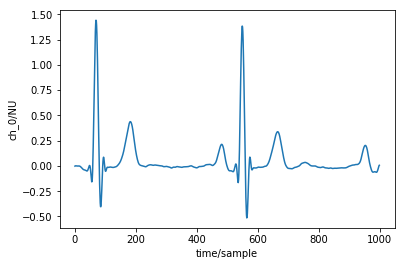

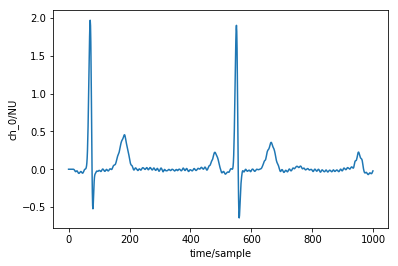

In [14]:
filtered_np100 = savgol_filter(np100,51,7)
wfdb.plot_items(signal=filtered_np100[0:1000])
wfdb.plot_items(signal=np100[0:1000])



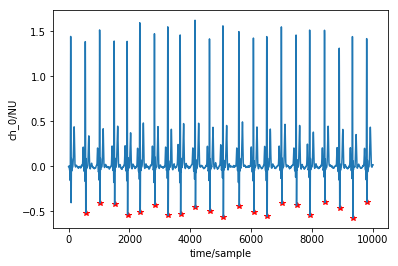

In [15]:
r_peaks = np.asarray(shs.r_peak_detector(filtered_np100[0:10000],mit123.annotations))
s_points = find_S_point(filtered_np100[0:10000],r_peaks)
wfdb.plot_items(signal=filtered_np100[0:10000],ann_samp=[s_points])



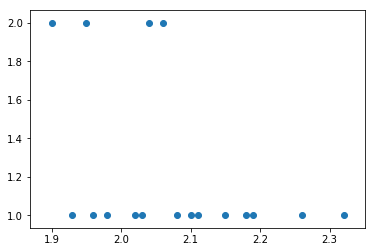

In [16]:

def average(numbers):
    return float(sum(numbers)) / len(numbers)

for i in range(0,len(s_points)):
        
        diff=round(mit123.filtered_MLII[r_peaks[i]] - mit123.filtered_MLII[s_points[i]],2)
        r_peaks_values.append(mit123.filtered_MLII[r_peaks[i]])
        s_points_values.append(mit123.filtered_MLII[s_points[i]])
        diffs.append(diff)


x ,y  = np.unique(diffs, return_counts=True) # counting occurrence of each loan
min(diffs)
plt.scatter(x,y)
plt.show()

In [17]:

r_peaks_values = []
s_points_values = []

all_diffs = []
all_diff_time = []
max_diff = 4
min_diff = 1

max_diffs = []
min_diffs = []

for i in mitdb.patient_records:
    
    
    diffs_time = []
    diffs = []
    #filtered_signal = savgol_filter(i.filtered_MLII,51,7)
    filtered_signal = i.filtered_MLII
    r_peaks = np.asarray(shs.r_peak_detector(filtered_signal,i.annotations))
    
    s_points = find_S_point(filtered_signal, r_peaks)

    for j in range(0,len(s_points)):
        diff=round(i.filtered_MLII[r_peaks[j]] - i.filtered_MLII[s_points[j]],2)
        diff_time = round(i.time[s_points[j]]-i.time[r_peaks[j]],2)
        if(diff<= min_diff):
            min_diffs.append([i.filename,r_peaks[j],diff])
        if(diff>=max_diff):
            max_diffs.append([i.filename,r_peaks[j],diff])
        
        diffs.append(diff) 
        diffs_time.append(diff_time)
    all_diffs.extend(diffs)
    all_diff_time.extend(diffs_time)


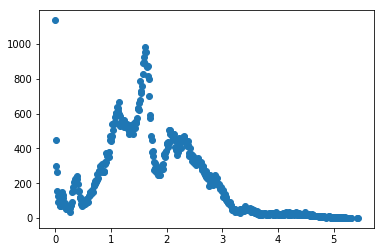

In [18]:
x ,y  = np.unique(all_diffs, return_counts=True) # counting occurrence of each 
plt.scatter(x,y)

In [38]:
average(all_diffs)

1.7234830861641335

In [39]:
max(y)

1135

In [13]:
np.where(y==1135)

(array([0], dtype=int64),)

In [14]:
max(x)

5.44

In [17]:
max_diffs

[['105', 607020, 4.37],
 ['107', 270, 4.39],
 ['107', 883, 4.08],
 ['107', 1204, 4.19],
 ['107', 1517, 4.3],
 ['107', 1817, 4.2],
 ['107', 2116, 4.23],
 ['107', 2719, 4.14],
 ['107', 3031, 4.32],
 ['107', 3345, 4.06],
 ['107', 3658, 4.56],
 ['107', 4265, 4.01],
 ['107', 4557, 4.31],
 ['107', 4857, 4.49],
 ['107', 5168, 4.48],
 ['107', 5488, 4.31],
 ['107', 6107, 4.14],
 ['107', 6406, 4.1],
 ['107', 7011, 4.2],
 ['107', 7944, 4.19],
 ['107', 8252, 4.17],
 ['107', 8549, 4.12],
 ['107', 8843, 4.38],
 ['107', 9779, 4.33],
 ['107', 10396, 4.54],
 ['107', 11602, 4.25],
 ['107', 12545, 4.29],
 ['107', 12837, 4.54],
 ['107', 13134, 4.58],
 ['107', 13430, 4.5],
 ['107', 13745, 4.47],
 ['107', 14067, 4.29],
 ['107', 14382, 4.16],
 ['107', 14686, 4.46],
 ['107', 15286, 4.32],
 ['107', 16203, 4.04],
 ['107', 16832, 4.51],
 ['107', 18353, 4.32],
 ['107', 19870, 4.48],
 ['107', 20493, 4.21],
 ['107', 21415, 4.44],
 ['107', 21713, 4.36],
 ['107', 22642, 4.12],
 ['107', 23569, 4.2],
 ['107', 23864, 4.

In [29]:
max_diffs[1]

['107', 270, 4.39]

In [19]:
len(max_diffs)
for i in range (0, len(mitdb.patient_records)):
    print(mitdb.patient_records[i].filename, i)

1750

In [19]:
mit107 = mitdb.patient_records[7]

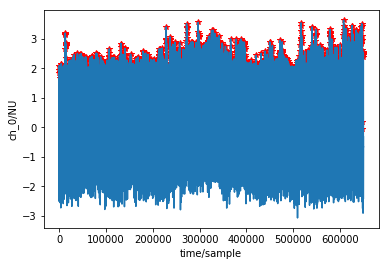

In [20]:
mit107_sub = mit107.filtered_MLII
r_peaks = np.asarray(shs.r_peak_detector(mit107_sub,mit107.annotations))

s_points = find_S_point(mit107_sub,r_peaks)
wfdb.plot_items(signal=mit107_sub,ann_samp=[r_peaks])


In [35]:
mit107_sub = mit107.filtered_MLII[len(mit107.filtered_MLII)-3000:len(mit107.filtered_MLII)]
r_peaks  = processing.xqrs_detect(sig=mit107_sub, fs=mit107.fields['fs'])
r_peak = np.asarray(shs.r_peak(mit107_sub,r_peaks))


Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


array([ 130,  389,  625,  883, 1187, 1491, 1802, 2117, 2428, 2735])

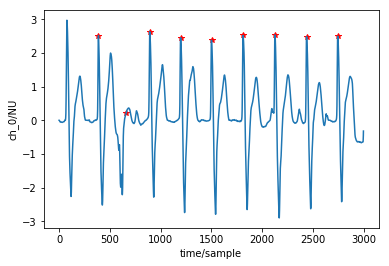

In [36]:
s_points  = find_S_point(mit107_sub,r_peak)

wfdb.plot_items(signal=mit107_sub,ann_samp=[r_peak])



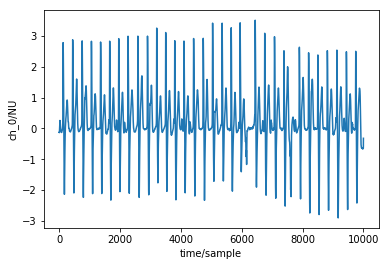

[]

In [42]:
indexes = list(range(len(mit107.filtered_MLII)-10000,len(mit107.filtered_MLII)))
mit107_sub = mit107.filtered_MLII[indexes]
beat_class, class_ID, r_poses = shs.r_peak_and_annotation(mit107.filtered_MLII,mit107.annotations,indexes)
wfdb.plot_items(signal=mit107_sub,ann_samp=[r_poses])
beat_class

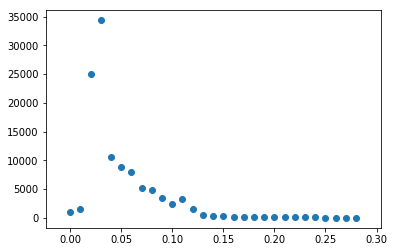

112541

In [54]:
x ,y  = np.unique(all_diff_time , return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)
plt.show()
len(all_diffs)